## Global Chrun rate by Python Lifetimes

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive


In [2]:
orders = pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/transactions.csv')
items = pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/Movies.csv')
custs = pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/Customers.csv')


In [3]:
custs.head

<bound method NDFrame.head of       cID cTitle  cSurname cForename                         cEmail  \
0       1     Dr     Peiro     Gaven            gpeiro0@comsenz.com   
1       2    Rev    Wanjek  Ethelred     ewanjek1@ezinearticles.com   
2       3     Mx    Ferens       Ade               aferens2@msu.edu   
3       4     Mr  Ragsdall    Melisa      mragsdall3@deviantart.com   
4       5     Mr    Aldiss    Helene           haldiss4@foxnews.com   
..    ...    ...       ...       ...                            ...   
995   996     Dr     Vayne     Dyane               dvaynern@nih.gov   
996   997     Mr    Brisco    Gordan              gbriscoro@fc2.com   
997   998     Mr  Comiskey   Baldwin  bcomiskeyrp@elegantthemes.com   
998   999     Dr  Itzchaki      Eran     eitzchakirq@purevolume.com   
999  1000     Mx     Rigge   Corette              criggerr@ebay.com   

       cPhoneNumber          cAddressLine1           cAddressLine2  \
0       44766011386   42309 Mcguire Center     

In [4]:
orders.groupby('cID').size().value_counts()

4     176
5     166
6     155
3     135
7     108
2      85
8      57
9      40
1      38
10     22
12      5
11      5
13      2
dtype: int64

In [5]:
print(orders.columns)

Index(['tID', 'mID', 'cID', 'tDate', ' tTime'], dtype='object')


In [6]:
transaction_data = pd.merge(orders,items,'inner','mID')
transaction_data.head()

,tID,mID,cID,tDate,tTime,mName,mDescription,mGenre,mRating,mYear,mRuntime,mLanguage,mCountry,mDirector,mWriter,mActors,mPrice
0,1,484,1,2/21/2020,18:59,Beyond Therapy,A few unusual characters and their unconventio...,Comedy,R,1987,93.0,English,USA,Robert Altman,Christopher Durang t,"Julie Hagerty,Jeff Goldblum,Glenda Jackson,Tom...",4.8
1,2,104,1,6/28/2020,21:16,Attack of the 50 Foot Woman,When an abused socialite grows to giant size b...,"Horror,Sci-Fi",Not Rated,1958,65.0,English,USA,Nathan Juran,Mark Hanna,"Allison Hayes,William Hudson,Yvette Vickers,Ro...",5.1
2,292,104,61,4/20/2020,13:02,Attack of the 50 Foot Woman,When an abused socialite grows to giant size b...,"Horror,Sci-Fi",Not Rated,1958,65.0,English,USA,Nathan Juran,Mark Hanna,"Allison Hayes,William Hudson,Yvette Vickers,Ro...",5.1
3,1326,104,256,6/11/2020,11:17,Attack of the 50 Foot Woman,When an abused socialite grows to giant size b...,"Horror,Sci-Fi",Not Rated,1958,65.0,English,USA,Nathan Juran,Mark Hanna,"Allison Hayes,William Hudson,Yvette Vickers,Ro...",5.1
4,3,202,1,7/7/2020,12:21,Jennifer's Body,A newly possessed high school cheerleader turn...,"Comedy,Horror",R,2009,102.0,"English, Spanish","USA, Canada",Karyn Kusama,Diablo Cody,"Megan Fox,Amanda Seyfried,Johnny Simmons,Adam ...",5.2


In [7]:
transaction_data = transaction_data[['cID', 'tID', 'tDate','mPrice' ]]
transaction_data['date'] = pd.to_datetime(transaction_data['tDate']).dt.date
transaction_data = transaction_data.drop('tDate',axis=1)
transaction_data.head()

,cID,tID,mPrice,date
0,1,1,4.8,2020-02-21
1,1,2,5.1,2020-06-28
2,61,292,5.1,2020-04-20
3,256,1326,5.1,2020-06-11
4,1,3,5.2,2020-07-07


In [8]:
summary = summary_data_from_transaction_data(transaction_data,'cID','date',monetary_value_col='mPrice',)
summary.describe()

,frequency,recency,T,monetary_value
count,990.000000,990.000000,990.000000,990.000000
mean,3.515152,218.762626,291.564646,5.855427
std,2.074759,99.814050,76.399298,1.706652
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,155.000000,260.250000,5.520833
50%,3.000000,241.000000,321.000000,6.158571
75%,5.000000,301.000000,347.000000,6.700000
max,11.000000,364.000000,364.000000,13.900000


In [9]:
summary.head()

,frequency,recency,T,monetary_value
cID,,,,
1,4.0,176.0,313.0,5.925000
2,3.0,293.0,339.0,6.466667
3,2.0,283.0,291.0,9.400000
4,3.0,165.0,241.0,5.733333
5,5.0,332.0,359.0,6.940000


In [10]:
summary[summary['frequency']>0].head()

,frequency,recency,T,monetary_value
cID,,,,
1,4.0,176.0,313.0,5.925000
2,3.0,293.0,339.0,6.466667
3,2.0,283.0,291.0,9.400000
4,3.0,165.0,241.0,5.733333
5,5.0,332.0,359.0,6.940000


In [11]:
transaction_data[transaction_data['cID']==1]

,cID,tID,mPrice,date
0,1,1,4.8,2020-02-21
1,1,2,5.1,2020-06-28
4,1,3,5.2,2020-07-07
9,1,4,6.5,2020-07-27
10,1,5,6.9,2020-08-15


In [12]:
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 990 subjects, a: 0.00, alpha: 223.88, b: 0.00, r: 2.72>

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

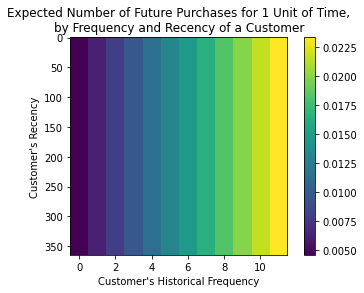

In [13]:
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

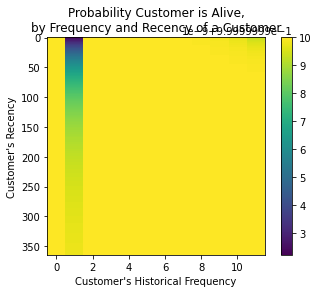

In [14]:
plot_probability_alive_matrix(bgf)

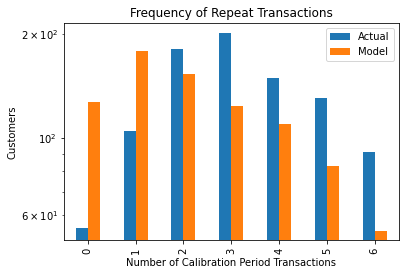

In [15]:
plot_period_transactions(bgf).set_yscale('log')

In [16]:
summary_cal_holdout = calibration_and_holdout_data(transaction_data, 'cID', 'date',calibration_period_end='2020-06-30', observation_period_end='2020-12-30')

In [17]:
print(summary_cal_holdout)

      frequency_cal  recency_cal  T_cal  frequency_holdout  duration_holdout
cID                                                                         
1               1.0        128.0  130.0                3.0             183.0
2               1.0         75.0  156.0                2.0             183.0
3               1.0         13.0  108.0                1.0             183.0
4               1.0         35.0   58.0                2.0             183.0
5               4.0        152.0  176.0                1.0             183.0
...             ...          ...    ...                ...               ...
996             2.0         91.0  112.0                0.0             183.0
997             1.0         10.0  138.0                4.0             183.0
998             0.0          0.0  120.0                2.0             183.0
999             3.0        147.0  172.0                1.0             183.0
1000            0.0          0.0  130.0                1.0             183.0

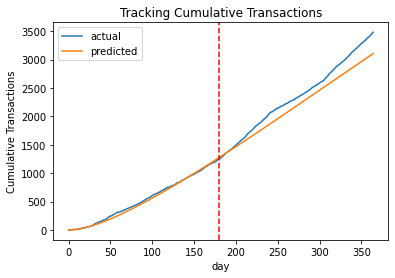

In [18]:
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_cumulative_transactions(bgf, transaction_data, 'date', 'cID', 365, 180);

<AxesSubplot:title={'center':'Tracking Daily Transactions'}, xlabel='day', ylabel='Transactions'>

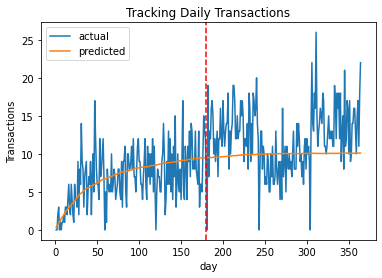

In [19]:
plot_incremental_transactions(bgf, transaction_data, 'date', 'cID', 365,180)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


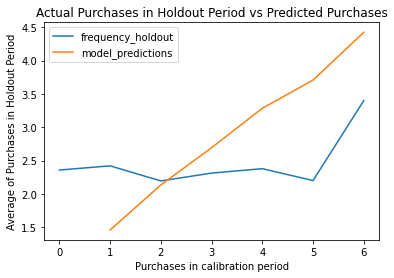

In [20]:
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout);

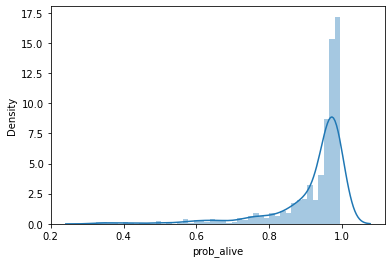

In [22]:
df = summary[summary['frequency']>0]
df['prob_alive'] = bgf.conditional_probability_alive(df['frequency'],df['recency'],df['T'])
sns.distplot(df['prob_alive']);

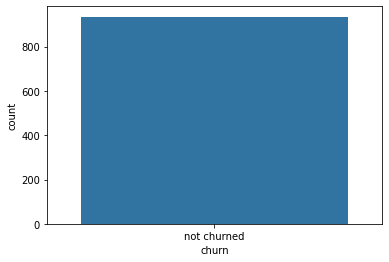

In [28]:
df['churn'] = ['churned' if p < .1 else 'not churned' for p in df['prob_alive']]
sns.countplot(df['churn']);

In [29]:
df['churn'][(df['prob_alive']>=.1) & (df['prob_alive']<.2)] = "risk"
df['churn'].value_counts()

not churned    935
Name: churn, dtype: int64

## Predict Churn from survey

This is just a testing, the accuracy is not high.  Also, we have cut down all the data with NULL.  If the new customer enter some Null data, the prediction does not work.

In [2]:
survey = pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/Surveys.csv')

In [3]:
survey.head()

,cID,sChurn,sAge,sIncome,sGender,sEmployment,sRelationship,sGenre,sSelection,sPricing,sSuggestions,sUsability,sSatisfactory
0,1,1,18-24,35000-49999,Other,None,Seperated,Film-Noir,9,3,2,3,0
1,2,0,25-34,50000-74999,Feamle,Full,NaN,Sport,0,6,3,7,8
2,3,1,55-64,35000-49999,Non-binary,Self,Seperated,Musical,2,6,4,1,0
3,4,1,25-34,15000-34999,Other,Student,NaN,Drama,8,1,0,3,6
4,5,1,55-64,NaN,Male,None,Married,Documentary,0,7,4,3,5


Build Regression tree for calculating Churn Rate

In [33]:
survey.rename(columns={"cID": "CustID", "sChurn": "Churn", "sAge":"AgeGroup", "sincome": "IncomeRate", "sGender":"Gender". "sEmployment": "EmploymentStatus", "sRelationship": "RelationshipStatus", "sGenre":"GenrePreference", "sSelection":"MovieSelctionSatisfactory", "sPricing": "PricingnSatisfactory", "sUsability":"Usability", "sSeggestions":"RecommendataionSatisfactory", "sRecommend":"W"})

,CustID,Churn,sAge,sIncome,sGender,sEmployment,sRelationship,sGenre,sSelection,sPricing,sSuggestions,sUsability,sRecommend
0,1,0.66,18-24,35000-49999,Other,None,Seperated,Film-Noir,9,3,2,3,0
1,2,0.52,25-34,50000-74999,Feamle,Full,NaN,Sport,0,6,3,7,8
2,3,0.74,55-64,35000-49999,Non-binary,Self,Seperated,Musical,2,6,4,1,0
3,4,0.64,25-34,15000-34999,Other,Student,NaN,Drama,8,1,0,3,6
4,5,0.62,55-64,NaN,Male,None,Married,Documentary,0,7,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.42,35-44,35000-49999,Other,Full,Seperated,Romance,0,10,7,2,10
996,997,0.56,25-34,35000-49999,Other,None,Married,Romance,7,4,3,7,1
997,998,0.20,35-44,74999-99999,Male,Part,NaN,Fantasy,8,9,9,10,4
998,999,0.46,55-64,50000-74999,NaN,NaN,Single,Action,5,7,4,9,2


In [36]:
survey.describe()

,cID,sChurn,sSelection,sPricing,sSuggestions,sUsability,sRecommend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.49676,4.969000,5.035000,5.107000,5.036000,5.015000
std,288.819436,0.14506,3.145462,3.188093,3.126872,3.144613,3.112951
min,1.000000,0.06000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.40000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,500.500000,0.50000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,750.250000,0.60000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,0.90000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
import seaborn as sns
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
from sklearn.metrics import classification_report

In [71]:
# Create a data with data background and churn rate only
cust_data =  pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/cust_churn_data_original.csv')

In [72]:
cust_data.head()

,cID,sAge,sIncome,sGender,sEmployment,sRelationship,sChurn
0,1,18-24,35000-49999,Other,None,Seperated,1
1,2,25-34,50000-74999,Feamle,Full,NaN,0
2,3,55-64,35000-49999,Non-binary,Self,Seperated,1
3,4,25-34,15000-34999,Other,Student,NaN,1
4,5,55-64,NaN,Male,None,Married,1


In [73]:
#Get number of customers churned
cust_data['sChurn'].value_counts()

0    639
1    361
Name: sChurn, dtype: int64

In [55]:
#What percentage of customers are leaving ?
retained = cust_data[cust_data.sChurn == 0]
churned = cust_data[cust_data.sChurn == 1]
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Print the percentage of customers that stayed and left
print( num_retained / (num_retained + num_churned) * 100 , "% of customers remained")
#Print the percentage of customers that stayed and left
print( num_churned / (num_retained + num_churned) * 100,"% of customers may leave")

63.9 % of customers remained
36.1 % of customers may leave


<AxesSubplot:xlabel='sChurn', ylabel='count'>

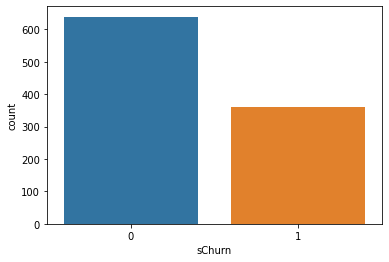

In [79]:
#Visualize the count of customer churn
sns.countplot(cust_data['sChurn'])

In [74]:
#check for missing data
cust_data.isna().sum()

cID                0
sAge             155
sIncome          131
sGender          207
sEmployment      179
sRelationship    198
sChurn             0
dtype: int64

In [139]:
#Remove the row of data with null value (by Excel)
#Insert table for cleaned value
cust_df = pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/cust_churn_data.csv')

In [140]:
#Get number of customers churne
cust_df['sChurn'].value_counts()

0    245
1    144
Name: sChurn, dtype: int64

In [141]:
#check for missing data
cust_df.isna().sum()

cID              0
sAge             0
sIncome          0
sGender          0
sEmployment      0
sRelationship    0
sChurn           0
dtype: int64

In [142]:
cust_df.shape

(389, 7)

In [143]:
#Remove the unnecessary column user_id
df = cust_df = cust_df.drop('cID', axis=1)

#Look at the number of rows and cols in the new data set
df.shape

(389, 6)

In [144]:
#Convert all nominal data to numeric type
for column in df.columns:
   if df[column].dtype == np.int64:
      continue
   df[column] = LabelEncoder().fit_transform(df[column])

#Check the new data set data types
df.dtypes

sAge             int32
sIncome          int32
sGender          int32
sEmployment      int32
sRelationship    int32
sChurn           int64
dtype: object

In [145]:
df.head()

,sAge,sIncome,sGender,sEmployment,sRelationship,sChurn
0,0,3,3,1,2,1
1,4,3,2,3,2,1
2,2,0,2,4,0,0
3,5,2,1,2,0,1
4,0,1,1,2,3,0


In [146]:
#Scale the cleaned data
X = df.drop('sChurn', axis = 1) 
y = df['sChurn']
#Standardizing/scaling the features
X = StandardScaler().fit_transform(X)

## Build Decision Tree Model

In [158]:
#Split the data into 50% training and 50% testing (has been tested to archive the highest accuracy)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [159]:
x_test.shape

(195, 5)

In [160]:
y_test.shape

(195,)

In [161]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_train = clf.predict(x_train)
y_pred = clf.predict(x_test)

In [162]:
# Check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5794871794871795


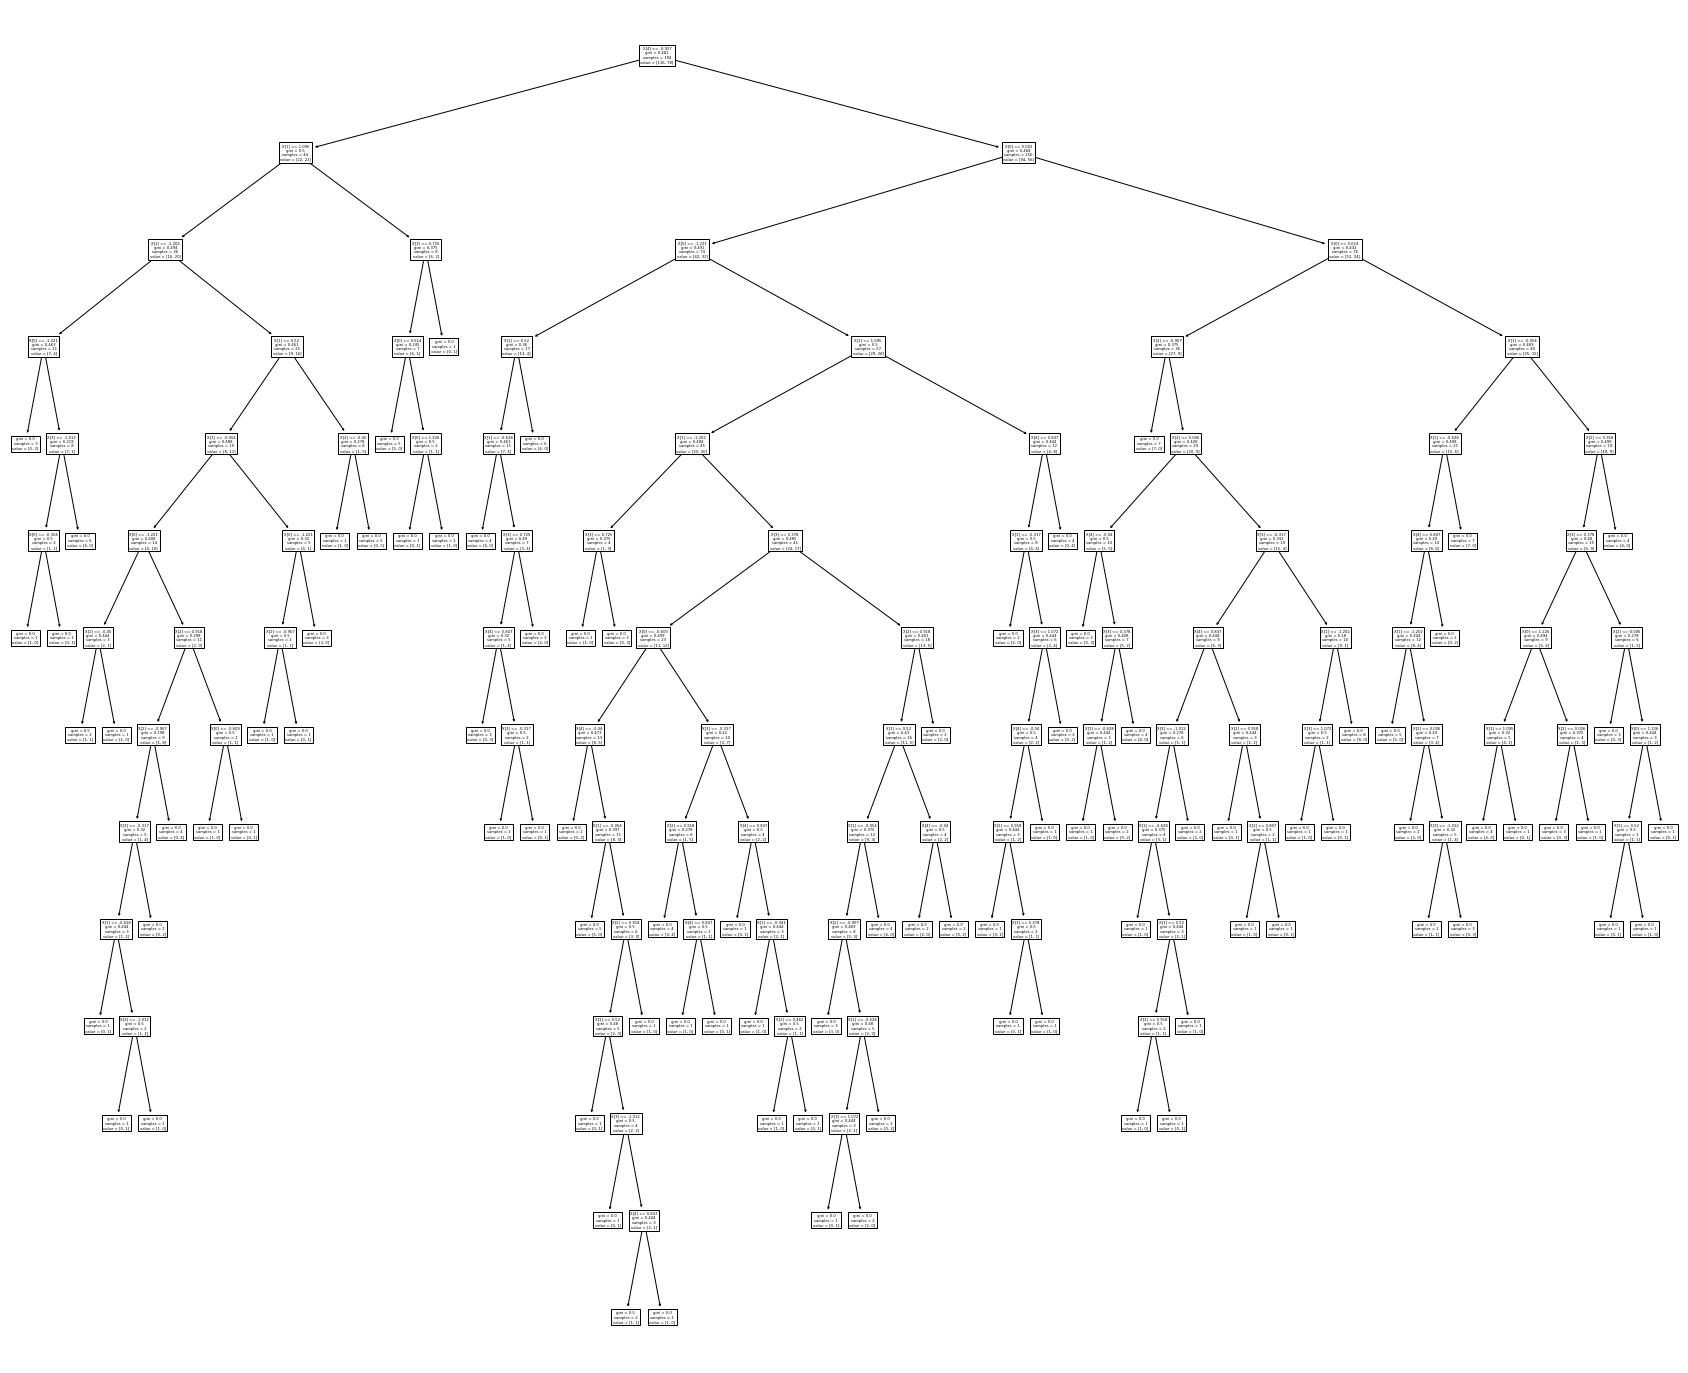

In [163]:
fig = plt.figure(figsize=(30,25))
_ = plot_tree(clf)
fig.savefig("decistion_tree1.png")

In [164]:
# Print classification report and confustion matrix
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print(classification_report(y_test, y_pred))

[[82 47]
 [35 31]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       129
           1       0.40      0.47      0.43        66

    accuracy                           0.58       195
   macro avg       0.55      0.55      0.55       195
weighted avg       0.60      0.58      0.59       195



## Logistic Regression Model

In [191]:
##Build Logistic Regression Mode
from sklearn.linear_model import LogisticRegression

#Create the model
model = LogisticRegression()
#Train the model
model.fit(x_train, y_train)

LogisticRegression()

In [192]:
predictions = model.predict(x_test)
#printing the predictions
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1]


In [193]:
#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       129
           1       0.56      0.14      0.22        66

    accuracy                           0.67       195
   macro avg       0.62      0.54      0.51       195
weighted avg       0.64      0.67      0.60       195



## Predict New Customer churn 

In [ ]:
#Predict New Customer churn
#Query latest user for prediction
#code for getting the data from the new survey input

pred_df = pd.read_sql('select ???')


In [ ]:
#Remove the unnecessary column 
clean_pred = pred_df = pred_df.drop('cID', axis=1)
clean_pred = pred_df = pred_df.drop('sSelection', axis=1)
clean_pred = pred_df = pred_df.drop('sPricing', axis=1)
clean_pred = pred_df = pred_df.drop('sSuggestions', axis=1)
clean_pred = pred_df = pred_df.drop('sUsability', axis=1)
clean_pred = pred_df = pred_df.drop('sRecommend', axis = 1)
clean_pred = pred_df = pred_df.drop('sGenre', axis = 1)

clean_pred.shape

In [ ]:
#Convert all nominal data to numeric type
for column in clean_pred.columns:
   if clean_pred[column].dtype == np.int64:
      continue
   clean_pred[column] = LabelEncoder().fit_transform(clean_pred[column])

#Check the new data set data types
clean_pred.dtypes

In [ ]:
#Churn = 1, reamin = 0

#Scale the cleaned data
X_pred = clean_pred.drop('sChurn', axis = 1) 
model.predict(X_pred)

## Building model for Churn from marking of service

In [38]:
serv = pd.read_csv('C:/Users/user/Desktop/HWU_Year2_Sem2/F21EC E-Commerce Technology/Part 2/F21EC-CW2-main/Surveys.csv')

In [39]:
serv.head(3)

,cID,sChurn,sAge,sIncome,sGender,sEmployment,sRelationship,sGenre,sSelection,sPricing,sSuggestions,sUsability,sSatisfactory
0,1,1,18-24,35000-49999,Other,None,Seperated,Film-Noir,9,3,2,3,0
1,2,1,25-34,50000-74999,Feamle,Full,NaN,Sport,0,6,3,7,8
2,3,1,55-64,35000-49999,Non-binary,Self,Seperated,Musical,2,6,4,1,0


In [40]:
#Remove the unnecessary column user_id
#ux_clean = serv = serv.drop('cID', axis=1)
ux_clean = serv = serv.drop('sAge', axis=1)
ux_clean = serv = serv.drop('sIncome', axis=1)
ux_clean = serv = serv.drop('sGender', axis=1)
ux_clean = serv = serv.drop('sEmployment', axis=1)
ux_clean = serv = serv.drop('sRelationship', axis = 1)
ux_clean = serv = serv.drop('sGenre', axis = 1)

#Look at the number of rows and cols in the new data set
ux_clean.shape

(1000, 7)

In [41]:
#Scale the cleaned data
X_U = ux_clean.drop('sChurn', axis = 1) 
y_U = ux_clean['sChurn']
#Standardizing/scaling the features
X_U = StandardScaler().fit_transform(X_U)

In [42]:
#Split the data into 80% training and 20% testing (with the highest accuracy)
ux_train, ux_test, uy_train, uy_test = train_test_split(X_U, y_U, test_size=0.2, random_state=42)

## Decision Tree

In [43]:
# Create Decision Tree classifer object
uclf = DecisionTreeClassifier()

# Train Decision Tree Classifer
uclf = uclf.fit(ux_train,uy_train)

#Predict the response for test dataset
uy_pred = uclf.predict(ux_test)

In [44]:
print(uy_pred)

[0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1]


In [45]:
# Print classification report and confustion matrix
from sklearn.metrics import classification_report, confusion_matrix
ucnf_matrix = confusion_matrix(uy_test, uy_pred)
print(ucnf_matrix)
print(classification_report(uy_test, uy_pred))

[[ 41  11]
 [ 13 135]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        52
           1       0.92      0.91      0.92       148

    accuracy                           0.88       200
   macro avg       0.84      0.85      0.85       200
weighted avg       0.88      0.88      0.88       200



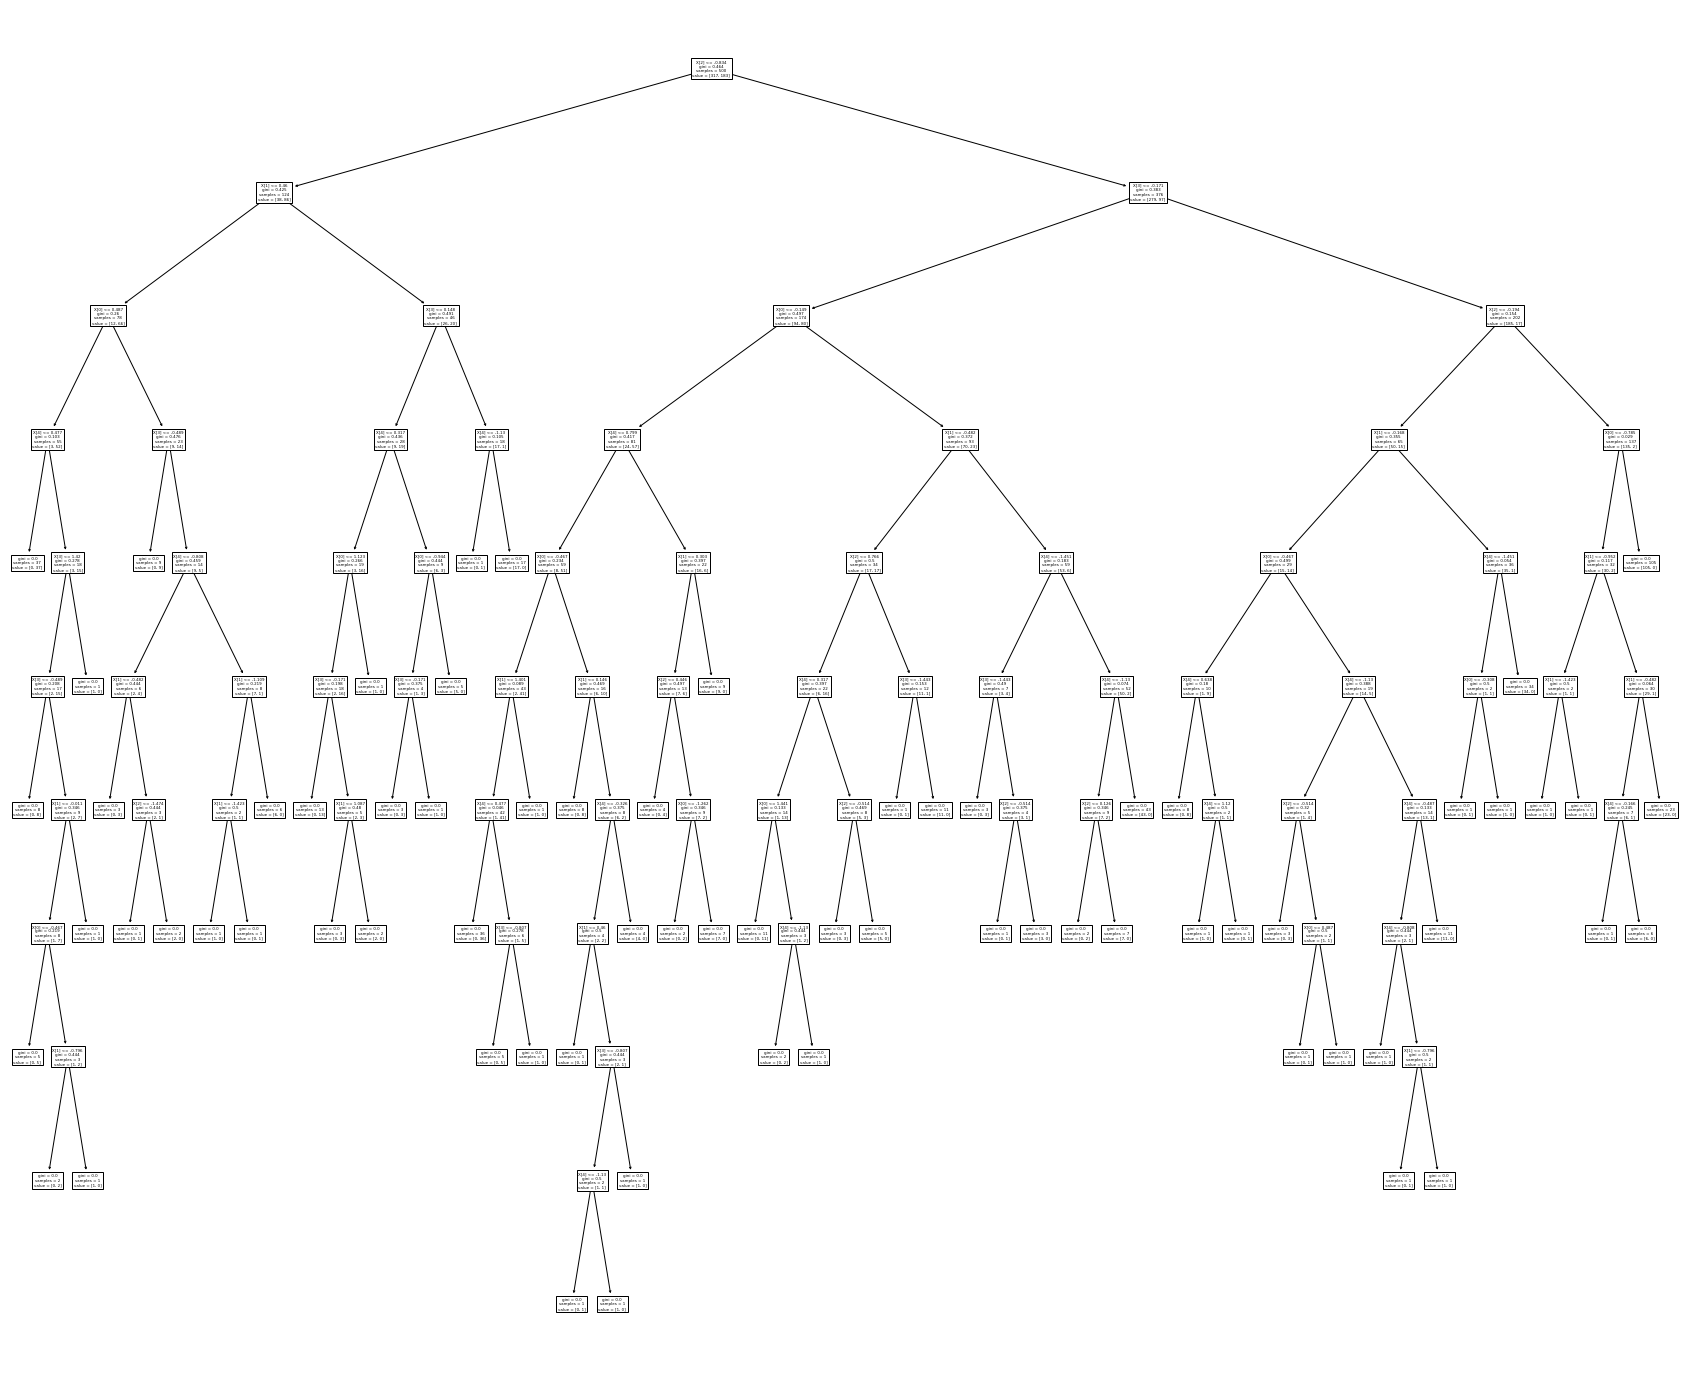

In [243]:
fig = plt.figure(figsize=(30,25))
_ = plot_tree(uclf)
fig.savefig("decistion_tree2.png")

## Logistic Regression Model

In [244]:
##Build Logistic Regression Mode

#Create the model
umodel = LogisticRegression()
#Train the model
umodel.fit(ux_train, uy_train)

LogisticRegression()

In [246]:
ux_predictions = umodel.predict(ux_test)
#printing the predictions
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [237]:
#Check precision, recall, f1-score
print( classification_report(uy_test, ux_predictions) )

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.97      0.99        75

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



To avoid Overfitting of result, Decision Tree model is suggested to use

## Predict New Customer churn 

In [ ]:
#Predict New Customer churn
#Query latest user for prediction
#code for getting the data from the new survey input

pred_udf = pd.read_sql('select ???')


In [ ]:
#Remove the unnecessary column 
clean_pred = pred_udf = pred_udf.drop('cID', axis=1)
clean_pred = pred_udf = pred_udf.drop('sAge', axis=1)
clean_pred = pred_udf = pred_udf.drop('sIncome', axis=1)
clean_pred = pred_udf = pred_udf.drop('sGender', axis=1)
clean_pred = pred_udf = pred_udf.drop('sEmployment', axis=1)
clean_pred = pred_udf = pred_udf.drop('sRelationship', axis = 1)
clean_pred = pred_udf = pred_udf.drop('sGenre', axis = 1)

clean_pred.shape

In [ ]:
#Churn = 1, reamin = 0

#Scale the cleaned data
new_pred = clean_pred.drop('sChurn', axis = 1) 
result = uclf.predict(new_pred)

print(result)